<a href="https://colab.research.google.com/github/Hrit-Saha/ML-Trained-Models/blob/main/Flights_Economy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Information

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Flights_Economy_Data.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)

In [ ]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Check for null values
print(df.isnull().sum().sum())

0


In [ ]:
df.drop_duplicates(inplace=True, keep='first')
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297940 entries, 0 to 297939
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297940 non-null  object 
 1   source_city       297940 non-null  object 
 2   departure_time    297940 non-null  object 
 3   stops             297940 non-null  object 
 4   arrival_time      297940 non-null  object 
 5   destination_city  297940 non-null  object 
 6   class             297940 non-null  object 
 7   duration          297940 non-null  float64
 8   days_left         297940 non-null  int64  
 9   price             297940 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.7+ MB


## Data Visualisation

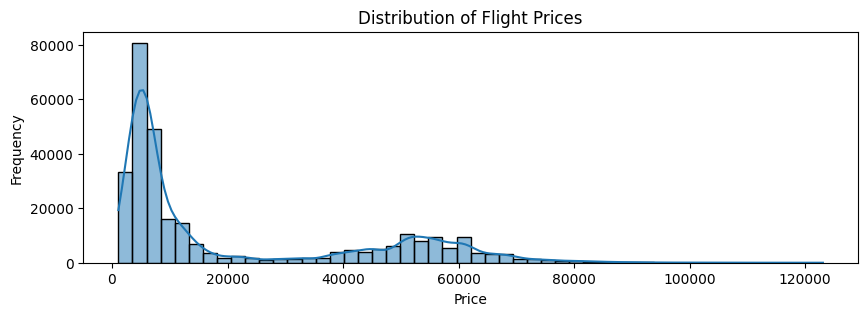

In [ ]:
# Plot distribution of flight prices
plt.figure(figsize=(10, 3))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

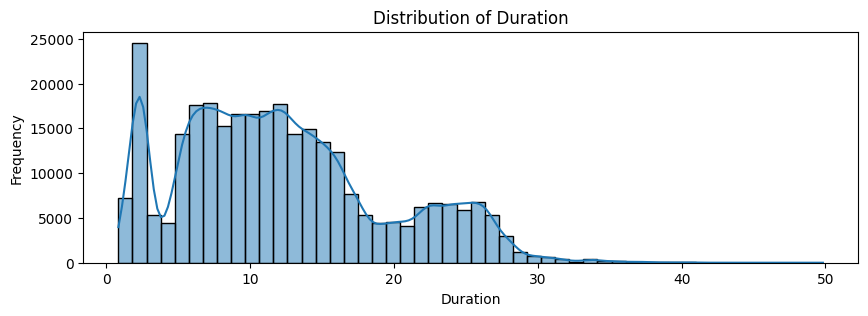

In [ ]:
# Plot distribution of duration
plt.figure(figsize=(10, 3))
sns.histplot(df['duration'], bins=50, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

## Encoding the catagorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# Label Encoding for 'airline', 'departure_time', 'arrival_time', 'class'
le = LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['class'] = le.fit_transform(df['class'])
df['stops'] = df['stops'].map({'one': 1, 'zero': 0, 'two_or_more': 2})

# One Hot Encoding for 'source_city', 'destination_city'
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int, handle_unknown='error')
source_city = pd.DataFrame(ohe.fit_transform(df[['source_city']]), columns=ohe.get_feature_names_out(['source_city']))
destination_city = pd.DataFrame(ohe.fit_transform(df[['destination_city']]), columns=ohe.get_feature_names_out(['destination_city']))
df = pd.concat([df, source_city, destination_city], axis=1)
df.drop(['source_city', 'destination_city'], axis=1, inplace=True)
df.head()

,airline,departure_time,stops,arrival_time,class,duration,days_left,price,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,4,2,0,5,1,2.17,1,5953,0,1,0,0,0,0,0,0,0,1
1,4,1,0,4,1,2.33,1,5953,0,1,0,0,0,0,0,0,0,1
2,0,1,0,1,1,2.17,1,5956,0,1,0,0,0,0,0,0,0,1
3,5,4,0,0,1,2.25,1,5955,0,1,0,0,0,0,0,0,0,1
4,5,4,0,4,1,2.33,1,5955,0,1,0,0,0,0,0,0,0,1


## Single Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Separate features and target
X = df['duration']
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = QuantileTransformer(output_distribution='normal', random_state=42)
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test = scaler.transform(X_test.values.reshape(-1, 1))
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

# Initialize the model
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f} \nMSE: {mse:.2f} \nMAE: {mae:.2f} \nR2: {r2:.2f}')

RMSE: 0.94 
MSE: 0.88 
MAE: 0.76 
R2: 0.11


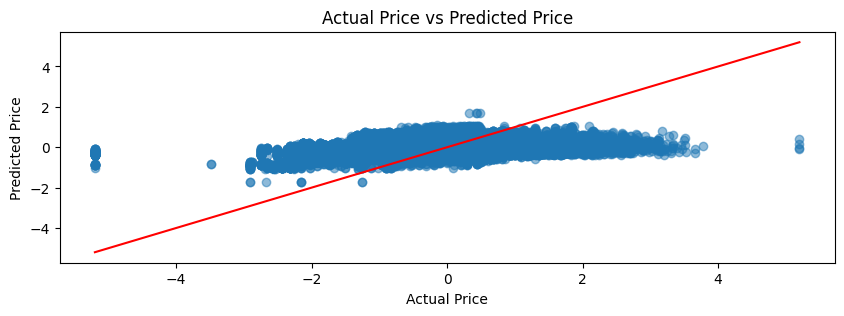

In [ ]:
# Scatter Plot between Predicted and Actual Prices
plt.figure(figsize=(10, 3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x for reference
plt.show()

## Multiple Linear Regression Model

In [ ]:
# Separate features and target
X = df.drop(columns=['price'])
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = QuantileTransformer(output_distribution='normal', random_state=42)
X_train[['duration']] = scaler.fit_transform(X_train[['duration']])
X_test[['duration']] = scaler.transform(X_test[['duration']])
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

# Initialize the model
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f} \nMSE: {mse:.2f} \nMAE: {mae:.2f} \nR2: {r2:.2f}')

RMSE: 0.51 
MSE: 0.26 
MAE: 0.39 
R2: 0.74


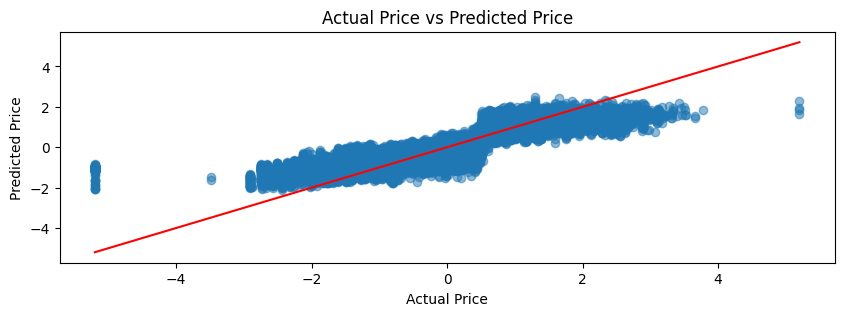

In [ ]:
# Scatter Plot between Predicted and Actual Prices
plt.figure(figsize=(10, 3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x for reference
plt.show()